## Simulator for Balancer Windows Rebalance

In [1]:
import sys
from pathlib import Path
sys.path.append('./libs/')
sys.path.append('./datas/')

from Datas_4_040122 import *
from Balancer_lib_new import *
from Strategy import *

import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
import copy
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

Import Datas for Strategies finished.
Imported Strategies 1 Start Step


## Initial parameters for the pool

In [2]:
n=4# the number of Tokens in Pool - do not change this parametr
# you may change parametrs below
fee=0.003#fee
gas_fee=150# Uniswap Swap	$151.58 USD 

#INIT POOL
amount=1000000#amount of each token in pool
ratio=[0.25]*n #start ratio of Token's Value in the pool
prices= [402.42, 11.208, 10.655, 37988.13]#market prices for init pool
pool = []#init pool
for i in range(0,n):
    pool.append(amount/prices[i])
weights=[0.25]*n#Init weights
print('start pool = ',pool)


start pool =  [2484.9659559664033, 89221.98429693076, 93852.65133740028, 26.324012263830834]


In [3]:
## INSTALL or CHANGE the PARAMETERS !!!

## INSTALL NEW RATIO and start Computing the resuls of Impermanent Loss

In [4]:
#INSTALL NEW RATIO
ratio1=[0.1, 0.1, 0.7,0.1]# new ratio
n_steps=30#number of steps for making changes
start_step=0 #from 0 upto len(datas)
step=start_step
vel=n_steps #velosity of changing weights


In [8]:
str1 = strategy1_1_step(pool, ratio1, datas, n, start_step, fee, gas_fee)
# return arr_IL1, arr_ratio1, pool11, weights11, value of tokens
str2 = strategy2_1_step(pool, weights, ratio1, datas, start_step, n, fee, n_steps, gas_fee)
# return Impermanent loss, ration of tokens, new pool, new weights, value of tokens
str3 = strategy3_1_step(pool, weights, ratio1, datas, start_step, n, fee, 20*n_steps, vel, gas_fee)
# return Impermanent loss, ration of tokens, new pool, new weights, value of tokens

## Main Result - Impermanent Loss Calculations

In [6]:
print('IL for Strategy 1,2,3 = ',str1[0],' ', str2[0][-1],' ', str3[0][-1] )

IL for Strategy 1,2,3 =  -0.46739325956705025   -0.0494469673595014   -0.05779619773933259


### Below different information and charts

## Market Prices. Period - 2 days 1 minute timeframe

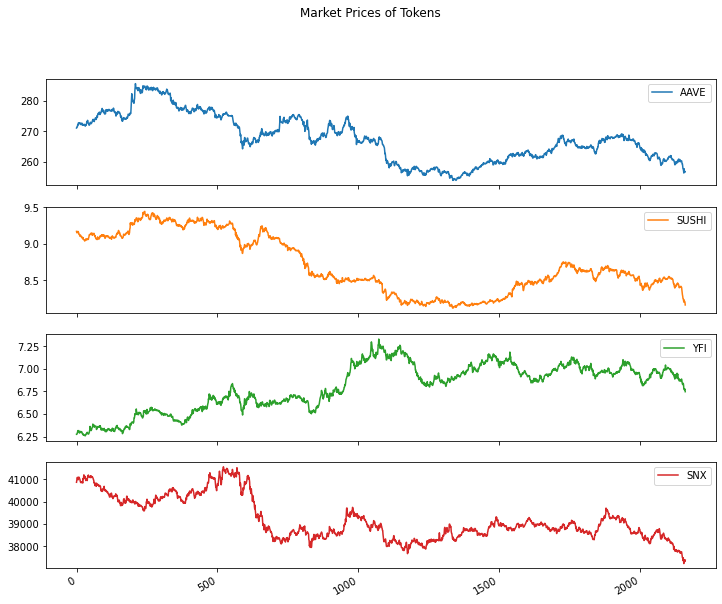

In [9]:
price=[]
for i in range(0,len(datas)):
    price.append(datas[i][0:4])
df=pd.DataFrame(price, columns=['AAVE', 'SUSHI', 'YFI', 'SNX'])
axs = df.plot(figsize=(12, 10), subplots=True, title='Market Prices of Tokens')

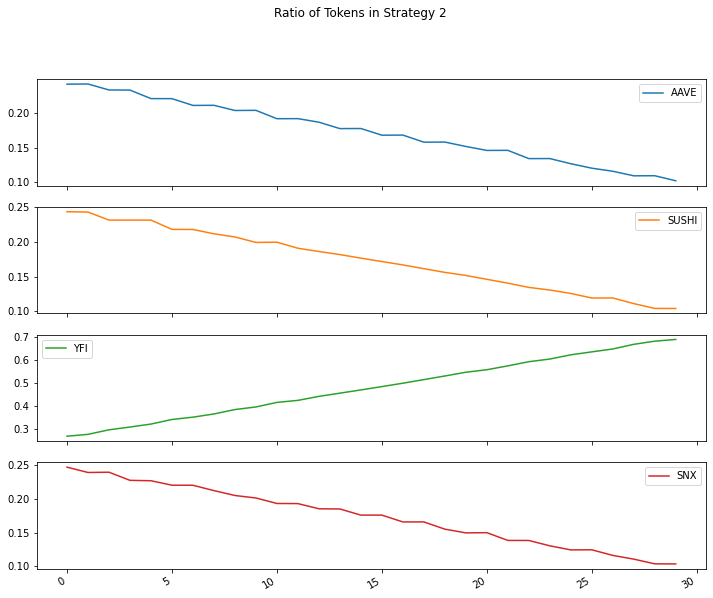

In [10]:
df=pd.DataFrame(str2[1], columns=['AAVE', 'SUSHI', 'YFI', 'SNX'])
axs = df.plot(figsize=(12, 10), subplots=True, title='Ratio of Tokens in Strategy 2')

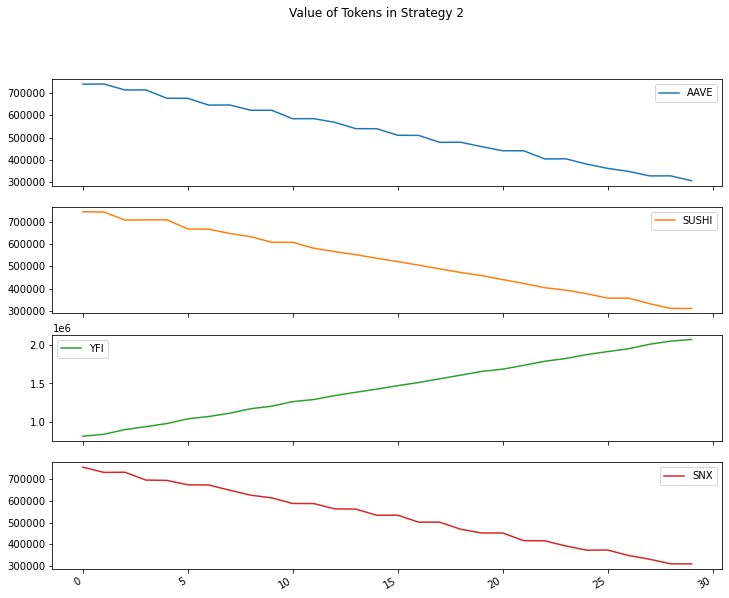

In [11]:
df=pd.DataFrame(str2[4], columns=['AAVE', 'SUSHI', 'YFI', 'SNX'])
axs = df.plot(figsize=(12, 10), subplots=True, title='Value of Tokens in Strategy 2')

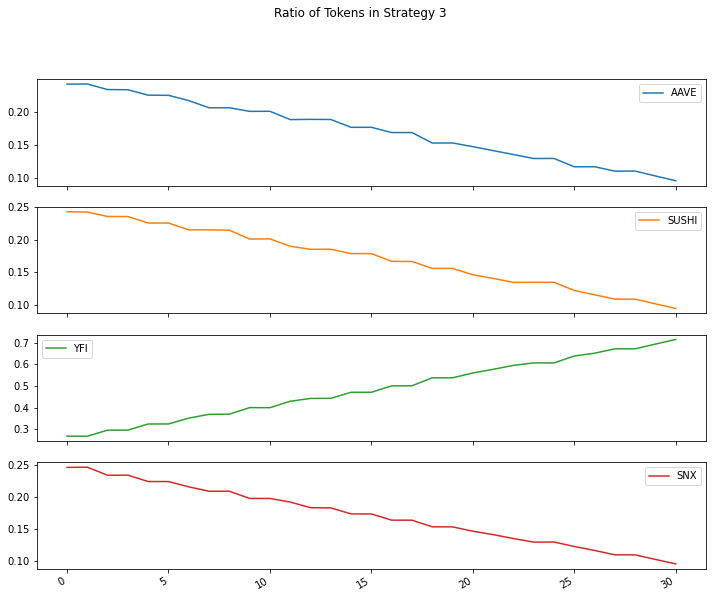

In [12]:
df=pd.DataFrame(str3[1], columns=['AAVE', 'SUSHI', 'YFI', 'SNX'])
axs = df.plot(figsize=(12, 10), subplots=True, title='Ratio of Tokens in Strategy 3')

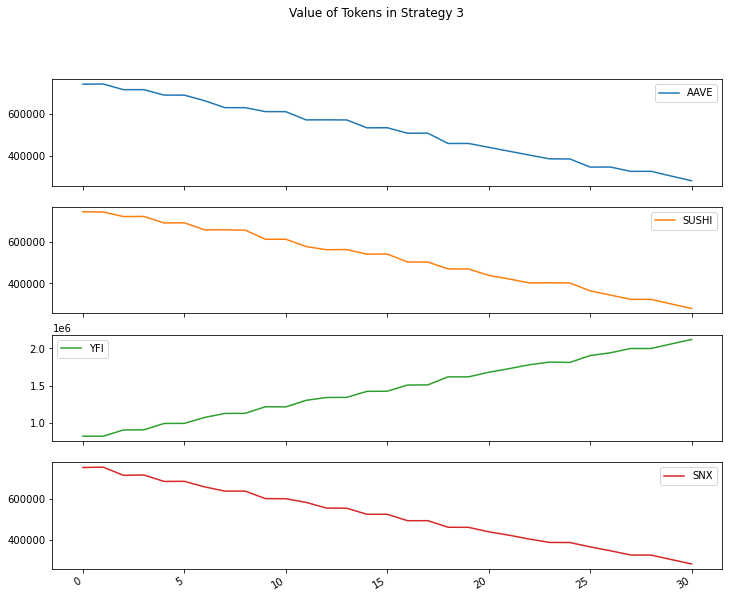

In [13]:
df=pd.DataFrame(str3[4], columns=['AAVE', 'SUSHI', 'YFI', 'SNX'])
axs = df.plot(figsize=(12, 10), subplots=True, title='Value of Tokens in Strategy 3')